The largest dataset with people wearing face masks 250,000 images, 4 types of mask worn, 60,000 unique faces. 

All images were collected using the Toloka.ai crowdsourcing service and validated by TrainingData.ru. 

Each object contains image size, photo type, person's age, gender, user ID.

**TYPES**

*TYPE 1 - There is no mask on the face.*

*TYPE 2 - The mask is on, but does not cover the nose or mouth.*

*TYPE 3 - The mask covers the mouth, but does not cover the nose.*

*TYPE 4 - The mask is worn correctly, covers the nose and mouth.*

## IMPORTING LIBRARIES

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# Magic Functions for In-Notebook Display
%matplotlib inline
# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

## GETTING INSIDE THE DIRECTORY

In [ ]:
cd '../input/medical-masks-part1'

## MAKING THE DATA FRAME

In [ ]:
train = pd.read_csv('df.csv', encoding='latin_1')
# Converting all column names to lower case
train.columns = train.columns.str.lower()
train

## LET'S GET SOME INSIGHTS AND STATISTICS OF THE DATA WE HAVE

In [ ]:
train.info()
train.describe()

## EXPLORATORY DATA ANALYSIS & DATA PRE-PROCESSING

**LETS CHECK ON ID AND USER ID:**

In [ ]:
train['id'].nunique()

In [ ]:
train['user_id'].nunique()

**WE CAN SEE THAT ID AND USER_ID COUNTS VARY THAT MEANS THAT WE HAVE SOME DUPLICATE DATA OR WE HAVE MORE THEN 4 IMAGES OF A SINGLE PERSON. LET'S SEE HOW THESE DUPLICATES ARE DISTRIBUTED:**

In [ ]:
uniqueUID = pd.DataFrame(list(train['user_id'].value_counts().index))
uniqueUID['user_id'] = list(train['user_id'].value_counts())
ax = sns.scatterplot(uniqueUID['user_id'], uniqueUID[0])
ax.set(xlabel="Number of images given to a single person", ylabel = "USER ID")

**WE CAN SEE THAT OUR OBSERVATION WAS RIGHT. THERE ARE 7 CASES IN DATA WHERE A SINGLE PERSON HAS MORE THEN 30 IMAGES. SO, BEFORE WE FILTER OUT THOSE DATA, IF YOU LOOK AT THE DATAFRAME AGAIN *(PRINTED BELOW)* YOU WILL NOTICE THAT THERE ARE SOME DATA WITH NONE IN GENDER. SO, LETS GET RID OF THOSE FIRST.**

In [ ]:
train

**HERE WE WILL USE THE IN BUILT QUERY FEATURE OF PANDAS DATA FRAME TO GET RID OF THOSE NONE DATA:**

In [ ]:
a = pd.DataFrame(train.query('gender != "NONE"'))

**AFTER ANY KIND OF DATA OPERATION PERFORM WE NEED TO CHECK IF THE DATA IS BALANCED FOR EVERY CLASS OR NOT.**

In [ ]:
a['type'].value_counts()

**ALL THE CLASSES ARE DISTRIBUTED EVENLY. NOW, LETS DEAL WITH USER_ID.**

**LET'S FIRST HAVE A LOOK OF DATA SET WITHOUT NONE VALUES**

In [ ]:
a

**IF YOU NOTICE THAT THE LAST FEW ROWS YOU WILL SEE THAT USER_ID IS 5228 AND ID IS 9998 THAT MEANS THAT 5228 HAS MORE THEN 4 IMAGES SO LET'S HAVE A LOOK**

In [ ]:
q = pd.DataFrame(a.query('user_id == 5228'))
q

**OUR GUESS WAS RIGHT AGAIN, IT HAS 16 COUNTS. LETS SEE IF THEY ALL ARE SAME PERSON OR NOT.**

In [ ]:
cd images

In [ ]:
import cv2
imgs = []
for i in list(np.array(q["name"])):
    im = cv2.imread(i)
    imgs.append(im)
    
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imgs),16))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(imgs[i])   
    plt.axis('off')


**WE CAN SEE THAT THEY ARE ALL SAME PERSON. SO, LET'S DROP OF THIS EXTRA DATA SO WE ONLY HAVE MEANINGFULL DATA TO WORK WITH**

In [ ]:
#LET'S GO BACK TO PREVIOUS DIRECTORY
cd ..


**WE HERE FILTER OUT EXTRA IMAGES**

In [ ]:
newdf = []
cuid = []
for i in np.array(a):
    if cuid.count(i[2]) < 4 or len(cuid) == 0:
        newdf.append(i)
        cuid.append(i[2])
        

In [ ]:
c = a.columns

**THE NEW DATAFRAME**

In [ ]:
newdf = pd.DataFrame(np.array(newdf), columns = c)

In [ ]:
newdf

In [ ]:
newdf.info()

In [ ]:
uniqueUID = pd.DataFrame(list(newdf['user_id'].value_counts().index))
uniqueUID['user_id'] = list(newdf['user_id'].value_counts())
ax = sns.scatterplot(uniqueUID['user_id'], uniqueUID[0])
ax.set(xlabel="Number of images given to a single person", ylabel = "USER ID")

**NOW THE PROBLEM OF USER_ID IS SOLVED! LET'S LOOK AT ANOTHER FEATURE, AND BEFORE WE DO THAT LET'S CHECK AGAIN IF THE DATA IS BALANCED OR NOT.**

In [ ]:
newdf['type'].value_counts()

**DATA IS BALANCED, LET'S HAVE A LOOK AT SIZE_MB**

In [ ]:
sns.boxplot(newdf['size_mb'])

**WE CAN SEE A LOT OF OUTLIER'S HERE! LET'S JUST GET RID OF THESE. WE WILL PANDAS QUERY TO ACHIEVE THIS:**

In [ ]:
slicer = pd.DataFrame(newdf.query('size_mb > 4'))
slicer = list(slicer['user_id'].unique())
len(slicer)

In [ ]:
for i in slicer:
    indexNames = newdf[newdf['user_id'] == i].index
    # Delete these row indexes from dataFrame
    newdf.drop(indexNames , inplace=True)

In [ ]:
sns.boxplot(newdf['size_mb'])

**NOW, THE SIZE_MB IS FREE FROM OUTLIERS. LET'S DEAL WITH AGE.**

In [ ]:
newdf['id'] = newdf['id'].astype(int)
newdf['user_id'] = newdf['user_id'].astype(int)
newdf['age'] = newdf['age'].astype(int)
newdf['size_mb'] = newdf['size_mb'].astype(float)

In [ ]:
newdf.describe() 

In [ ]:
sns.boxplot(newdf['age'])

**AGE HAS OUTLIERS TOO. LET'S WORK ON IT.**

In [ ]:
slicer = pd.DataFrame(newdf.query('age > 50'))
slicer = list(slicer['age'].unique())
len(slicer)
for i in slicer:
    indexNames = newdf[newdf['age'] == i].index
    # Delete these row indexes from dataFrame
    newdf.drop(indexNames , inplace=True)

**AFTER QUERING, WE CAN SEE THE BOXPLOT BELOW THAT WE ARE FREE FROM OUTLIERS IN AGE.**

In [ ]:
sns.boxplot(newdf['age'])

**LET'S CHECK AGAIN IF THE DISTRIBUTION IS EVEN OR NOT.**

In [ ]:
newdf['type'].value_counts()

In [ ]:
newdf.describe()

In [ ]:
newdf.shape

## TRAINING

**NOW WE ARE DONE WITH EDA AND DATA PRE-PROCESSING. LET'S BEGIN THE TRAINING. WE WILL BE USING ONLY 4000 OF THE IMAGES SO THAT LESS COMPUTATION TIME IS TAKEN FOR TRAINING AND READING THE IMAGES AND REMAINING WE WILL USE FOR TESTING**

In [ ]:
training = pd.DataFrame(newdf[:4000])
testing = pd.DataFrame(newdf[8000:])

In [ ]:
training

**LET'S GO IN IMAGE DIRECTORY TO GET OUR DATA**

In [ ]:
cd images

**GETTING IMAGES**

In [ ]:
import glob as gb
import cv2
from tqdm import tqdm
X = []
y = []
s = 299
for i in tqdm(list((training['name']))):
    image = cv2.imread(i)
    image_array = cv2.resize(image , (s,s))
    X.append(list(image_array))
    y.append(int(i.split("_")[1])-1)
    

**LET'S HAVE A LOOK AT DATA WITH LABELS**

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(y[i])

**CONVERTING TO NUMPY ARRAY FOR TRAINING**

In [ ]:
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

**GETTING LIBRARIES FOR TRAINING OUR DEEP LEARNING MODEL**

In [ ]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import Xception #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

**SPLITTING THE DATA**

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.3)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

**ENCODING OUR LABELS**

In [ ]:
from keras.utils import to_categorical
#One Hot Encoding
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
#Verifying the dimension after one hot encoding
print((X_train.shape,y_train.shape))
print((X_val.shape,y_val.shape))

**DEFINING THE PRE-TRAINED MODEL XCEPTION AND ADDING IT THE LAST DENSE LAYER TO IT FOR OUR FOUR CLASSES**

In [ ]:
import tensorflow as tf
import keras
from keras.applications.xception import Xception
model=Xception(include_top = False, weights = 'imagenet', input_shape = (299,299,3))
flattened = tf.keras.layers.Flatten()(model.output)

fc1 = tf.keras.layers.Dense(4, activation='softmax', name="AddedDense2")(flattened)

model = tf.keras.models.Model(inputs=model.input, outputs=fc1) 

**COMPILING THE MODEL**

In [ ]:
model.compile(optimizer ='adamax',loss='categorical_crossentropy',metrics=['accuracy'])

print('Model Details are : ')
print(model.summary())

**FITTING THE MODEL**

In [ ]:

from keras.callbacks import ModelCheckpoint, EarlyStopping   
callbacks_list = [  
    ModelCheckpoint('/kaggle/working/AMD.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True),
]  

ThisModel = model.fit(X_train, y_train, epochs=10, callbacks=callbacks_list, verbose=1, validation_data=(X_val,y_val))

**LET'S LOOK AT PROGRESS:**

In [ ]:
# summarize history for accuracy
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(ThisModel.history['loss'])
plt.plot(ThisModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**SAVING THE MODEL**

In [ ]:
from keras.models import load_model
model.save("/kaggle/working/AMD.h5")
#LOADING THE BEST MODEL
model = load_model("/kaggle/working/AMD.h5")

**LET'S CHECK HOW MODEL PERFORMS ON VALIDATION DATA**

In [ ]:
y_pred1a = model.predict(X_val, verbose=1)      
y_pred_bool1a = np.round(np.array([list(i) for i in y_pred1a]))
from sklearn.metrics import accuracy_score
print("THE ACCURACY SCORE IS: {}".format(accuracy_score(y_val, y_pred_bool1a)))
from sklearn.metrics import roc_auc_score
print("THE AUCROC SCORE IS: {}".format(roc_auc_score(y_val, y_pred_bool1a)))
from sklearn.metrics import average_precision_score     
print("THE PRAUC SCORE IS: {}".format(average_precision_score(y_val, y_pred_bool1a))) 

**DEFINING A PREDICTOR FUNCTION**

In [ ]:
def predictor(a):
    image = cv2.imread(a)
    image_array = cv2.resize(image , (299,299))
    image = list(image_array)
    im = []
    im.append(image)
    a = np.array(im)
    one = "The mask is worn correctly, covers the nose and mouth."
    two = "The mask covers the mouth, but does not cover the nose."
    three =  "The mask is on, but does not cover the nose and mouth."
    four = "There is no mask on the face."
    a = model.predict(a)
    a = [int(np.round(j)) for i in a for j in i]
    if a == [1, 0, 0, 0]:
#         s = 0
        s = one
        return s
    elif a == [0, 1, 0, 0]:
#         s = 1
        s=two
        return s
    elif a == [0, 0, 1, 0]:
#         s = 2
        s=three
        return s
    elif [0, 0, 0, 1]:
#         s = 3
        s=four
        return s

## LET'S PREDICT FOR THESE IMAGES

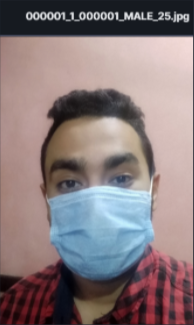 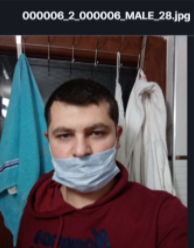 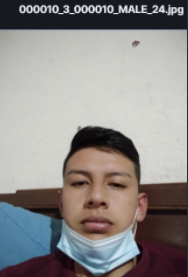 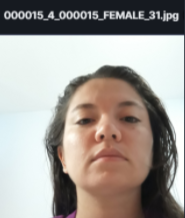

In [ ]:
image = predictor('000001_1_000001_MALE_25.jpg')
image

In [ ]:
image = predictor('000006_2_000006_MALE_28.jpg')
image

In [ ]:
image = predictor('000010_3_000010_MALE_24.jpg')
image

In [ ]:
image = predictor('000015_4_000015_FEMALE_31.jpg')
image

## NOW LET'S PREDICT THE TESTING DATA:

In [ ]:
testing


**DEIFINING AN ARRAY WITH THE CORRECT VALUES OF CLASS FROM TYPE COLUMN**

In [ ]:
actualvalues = np.array(testing["type"])
actualvalues

**GETTING THE NAMES OF THE IMAGES**

In [ ]:
images = np.array(testing["name"])
images

**MAKING ARRAY OF PREDICTED VALUES**

In [ ]:
predictedvalues = []
for i in images:
    op = predictor(i)
    predictedvalues.append(op)

In [ ]:
predictedvalues = np.array(predictedvalues)

In [ ]:
predictedvalue = []
for a in tqdm(predictedvalues):
    if a == 'The mask is worn correctly, covers the nose and mouth.':
        s = 1
        predictedvalue.append(s)
    elif a == 'The mask covers the mouth, but does not cover the nose.':
        s = 2
        predictedvalue.append(s)
    elif a == 'The mask is on, but does not cover the nose and mouth.':
        s = 3
        predictedvalue.append(s)
    elif a == 'There is no mask on the face.':
        s = 4
        predictedvalue.append(s)

In [ ]:
predictedvalue = np.array(predictedvalue)

**CONVERTING BOTH THE ARRAYS TO CATEGORICAL**

In [ ]:
actualvalues=to_categorical(actualvalues)
predictedvalue=to_categorical(predictedvalue)

**CHECKING ACCURACY**

In [ ]:
from sklearn.metrics import accuracy_score
print("THE ACCURACY SCORE IS: {}".format(accuracy_score(actualvalues, predictedvalue)))

**SO, ON TESTING DATA THE ACCURACY IS 97.5%**